#               <h1>Titanic⛵ Disaster Dataset<h1>

<centre>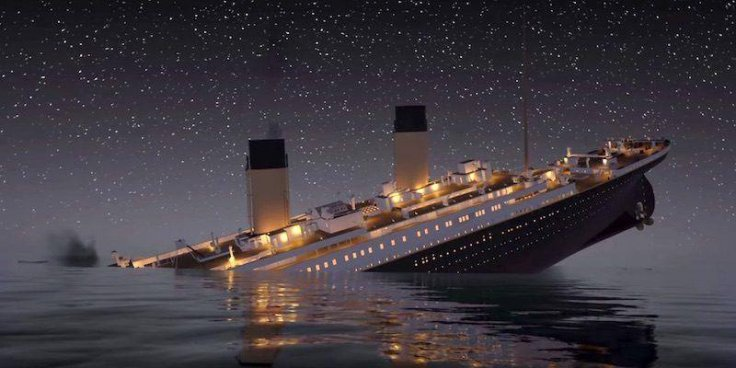<centre>

## **DESCRIPTION:**

Classic dataset on Titanic disaster used often for data mining tutorials and demonstrations.

## **SUMMARY:**

This is a classic dataset used in many data mining tutorials and demos -- perfect for getting started with exploratory analysis and building binary classification models to predict survival.

Data covers passengers only, not crew.

## **FEATURES:**

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)**

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import pandas_profiling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

## Reading and Understanding the Data

In [3]:
#read the data

train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Numerical Features**   : PassengerId,Age,Fare,SibSp,Parch
* **Categorical Features** : Survived,Pclass,Name,Sex,Embarked

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* **Numerical Features**   : PassengerId,Age,Fare,SibSp,Parch
* **Categorical Features** : Pclass,Name,Sex,Embarked

In [6]:
#No. of rows and coloumns

print("train:",train.shape)
print("test:",test.shape)

train: (891, 12)
test: (418, 11)


In [7]:
# data information

train.info()
print('_'*50)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


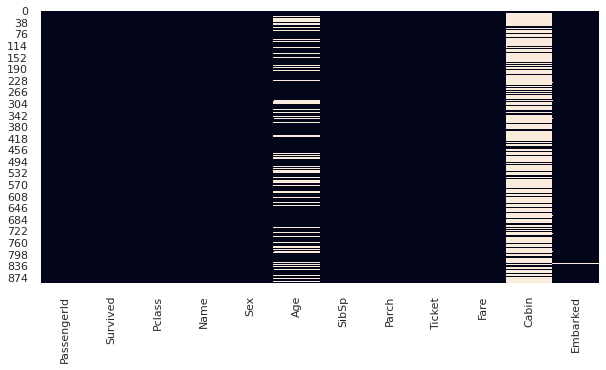

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(), cbar=False)

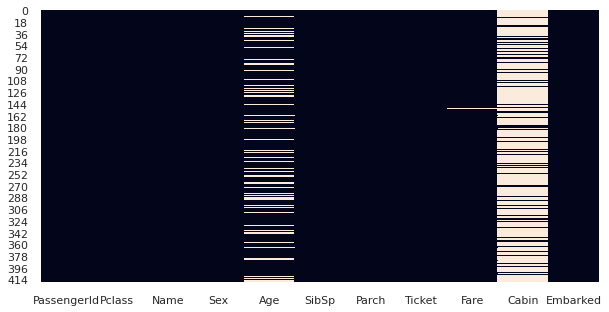

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(test.isnull(), cbar=False)

### We have high number of missing values in Age and Cabin columns of both Train and Test dataset.

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Missing Values:
*   Cabin       :   687
*   Age         :   177 
*   Embarked    :   2

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## **Missing Values**:

* Cabin : 327
* Age : 86
* Fare :1 


## Handling Missing Values

## 1) Age

### Imputing the missing values of Age with median as the column has no outliers.

In [14]:
train['Age']= train['Age'].fillna(train['Age'].median())
test['Age']= test['Age'].fillna(test['Age'].median())

In [15]:
print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())

0
0


## 2) Cabin

In [16]:
train["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [17]:
test["Cabin"].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [18]:
train['Cabin'][train['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [19]:
test['Cabin'][test['Cabin'].notnull()].head()

12                B45
14                E31
24    B57 B59 B63 B66
26                B36
28                A21
Name: Cabin, dtype: object

### Observing the values above the first letter is for "Deck".However the missing values for cabin might be because not everyone was allocated a Cabin and we could just make use of Deck and fill the missing.

In [20]:
train["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'M' for i in train['Cabin']])
test["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'M' for i in test['Cabin']])

In [21]:
print(train["Cabin"].isnull().sum())
print(test["Cabin"].isnull().sum())

0
0


In [22]:
test['Cabin'].value_counts()

M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

## 3) Embarked

In [23]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### Imputing the missing values with mode.

In [24]:
train['Embarked']= train['Embarked'].fillna(train['Embarked'].mode()[0])

In [25]:
train['Embarked'].isnull().sum()

0

## 4) Fare

In [26]:
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

In [27]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [28]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Visualisations

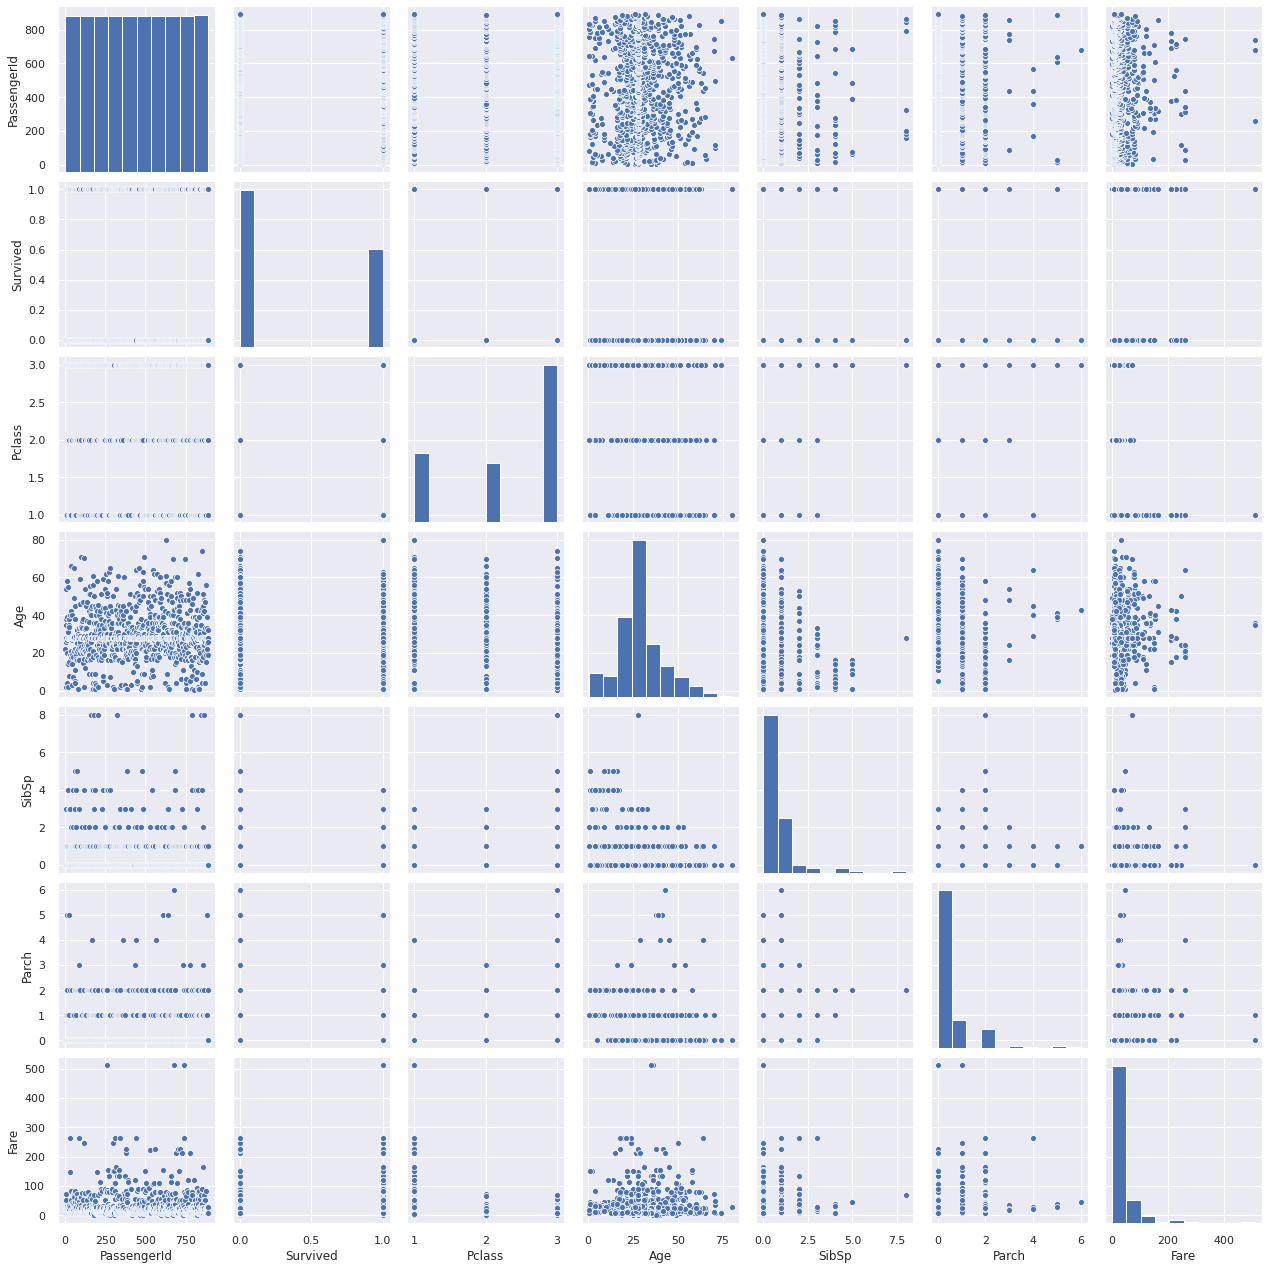

In [29]:
sns.pairplot(train)

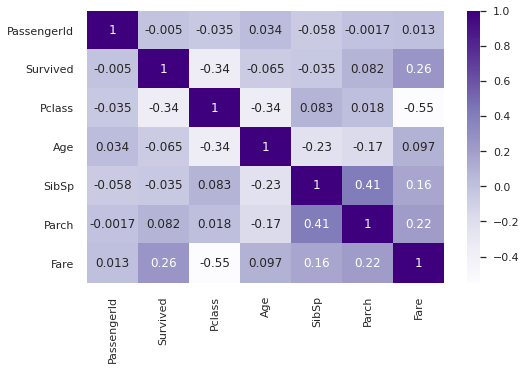

In [30]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(),annot=True,cmap='Purples')

**Observations**:

* Survived is highly correlated with Fare which can be assumed that higher the fare is higher the priority given to such passengers.
* Survived is also strongly related to Passenger Class which also says higher Pclass i.e., 2 or 3 is likely to survive less as the classes were at bottom, which says they were likely to hit the water first.

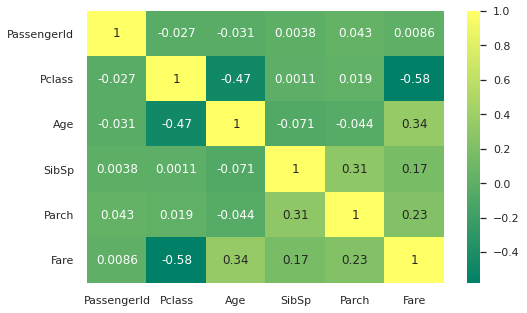

In [31]:
plt.figure(figsize=(8,5))
sns.heatmap(test.corr(),annot=True,cmap='summer')

## 1) Passenger Class

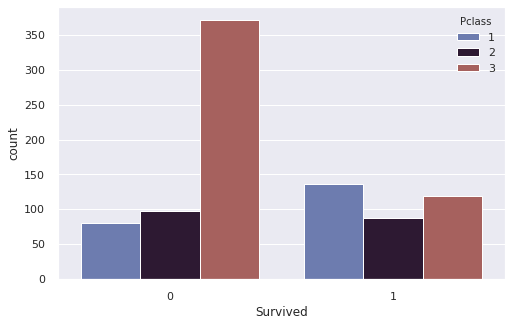

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Survived',hue='Pclass',data=train,palette='twilight')

**Observations**:
    
* Survived passengers are higher in number from Pclass-1, they were evacuated first.
* Passengers from Pclass-3 are higher in count who couldn't survive as they were the first to hit the water flow.

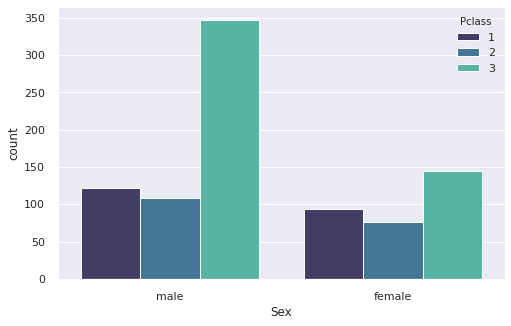

In [33]:
plt.figure(figsize=(8,5))
sns.countplot('Sex',hue='Pclass',data=train,palette='mako')

**Observations**:

* We can see more of the passengers were in Pclass-3 
* Passengers had high ratio of males when compared to females.

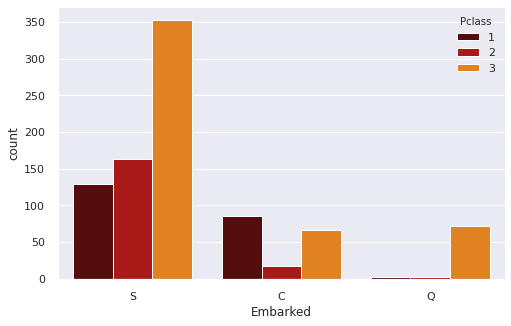

In [34]:
plt.figure(figsize=(8,5))
sns.countplot('Embarked',hue='Pclass',data=train,palette='gist_heat')

Observations:

* Most of the were passengers coming from Southampton in Pclass-3.

In [35]:
train['Family_size']= train['SibSp']+train['Parch']+1

In [36]:
test['Family_size']= test['SibSp']+test['Parch']+1

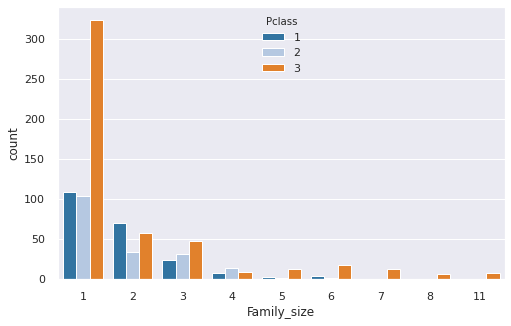

In [37]:
plt.figure(figsize=(8,5))
sns.countplot('Family_size',hue='Pclass',data=train,palette='tab20')

Observations:

* Most of the passengers in Pclass-3 were Single.
* The families also were maximum in number were in Pclass-3.

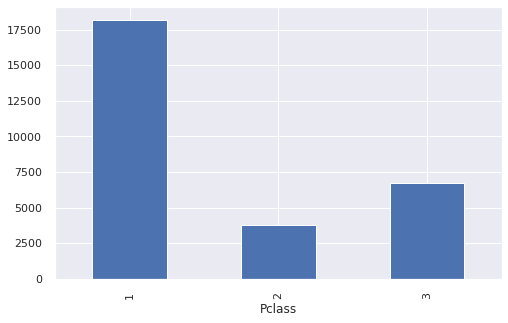

In [38]:
plt.figure(figsize=(8,5))
train.groupby('Pclass')['Fare'].sum().plot(kind='bar')

Observations:
    
* The fare of Pclass-1 being the expensive and Pclass-3 cheapest one.

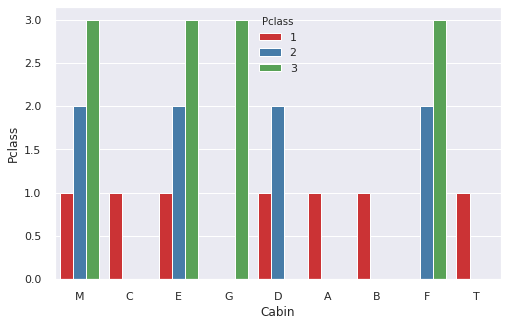

In [39]:
plt.figure(figsize=(8,5))
sns.barplot('Cabin','Pclass',hue='Pclass',data=train,palette='Set1')

Observations:

* P-3 passengers were in Deck M,G,E and F.
* P-2 passengers were in Deck M,E,D,and F.
* P-1 passengers were in Deck M,C,D,A,B and T

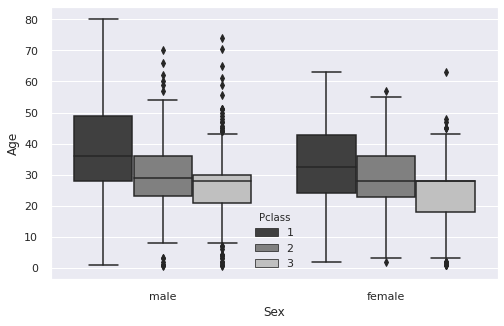

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(y="Age",x="Sex",hue="Pclass", data=train,palette='gray')

**Observations**:
    
* The passengers in Pclass-1 were elder than the passengers in other Pclass.
* Age distribution seems to be the same in Male and Female subpopulations.

## 2) Sex

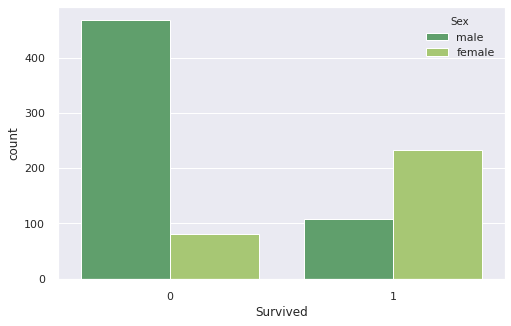

In [41]:
plt.figure(figsize=(8,5))
sns.countplot('Survived',hue='Sex',data=train,palette='summer')

Observations:

* This clearly reminds me of the line "Female and Children only!" and it is evident that females were evacuated first.
* There were only few men who were rescued when most of the female and children were evacuated.

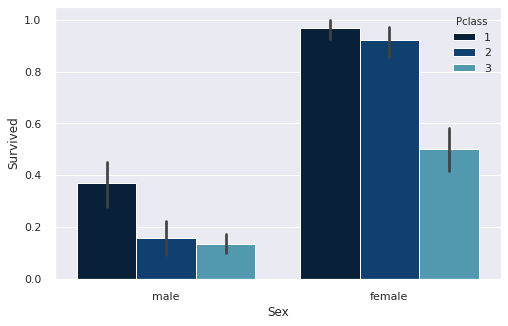

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(y="Survived", x="Sex", hue="Pclass", data=train, palette="ocean")

Observations:

* This clearly shows first females were rescued from all the Pclass.

## 3) Age

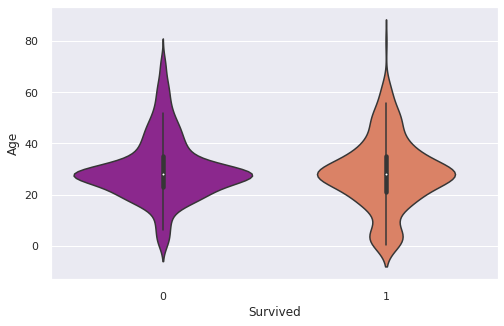

In [43]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Survived", y = "Age",data = train,palette='plasma',size=6)

**Observations**:
    
* The violin plot of survived passengers, we can notice that very young passengers have higher survival rate.

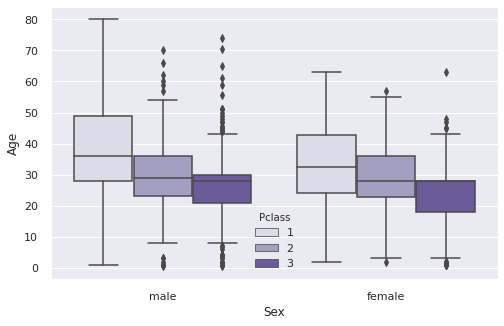

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(y="Age",x="Sex",hue="Pclass",data=train,palette='Purples')

Observations:
    
* The aged passengers are in Pclass 1 and younger in the other two Pclass.So the older passengers were rescued first and later the younger ones.

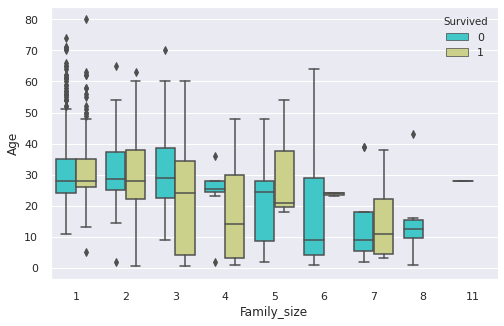

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(y="Age",x="Family_size",hue="Survived", data=train,palette='rainbow')

Observations:

* Passengers with small families could survive when compared to families with more than 5 members.

## 4) Family Size

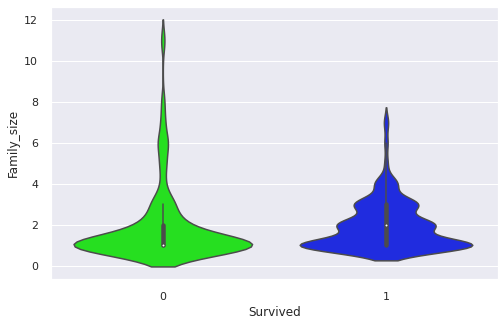

In [46]:
plt.figure(figsize=(8,5))
sns.violinplot(y="Family_size",x='Survived',data = train,palette='hsv')

Observations:

* Family Size of 6-8 were able to survive.    

## 5) Embarked

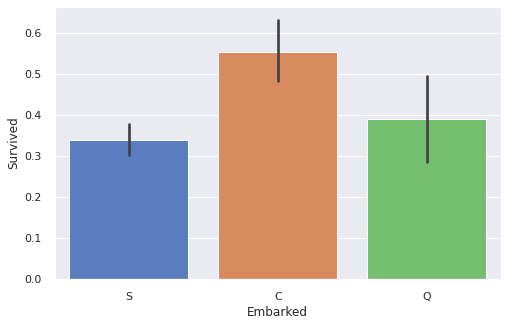

In [47]:
plt.figure(figsize=(8,5))
sns.barplot('Embarked','Survived',data=train,palette='muted')

Observations:

* It seems that passenger coming from Cherbourg (C) are likely to have higher survival rate.

<Figure size 576x360 with 0 Axes>

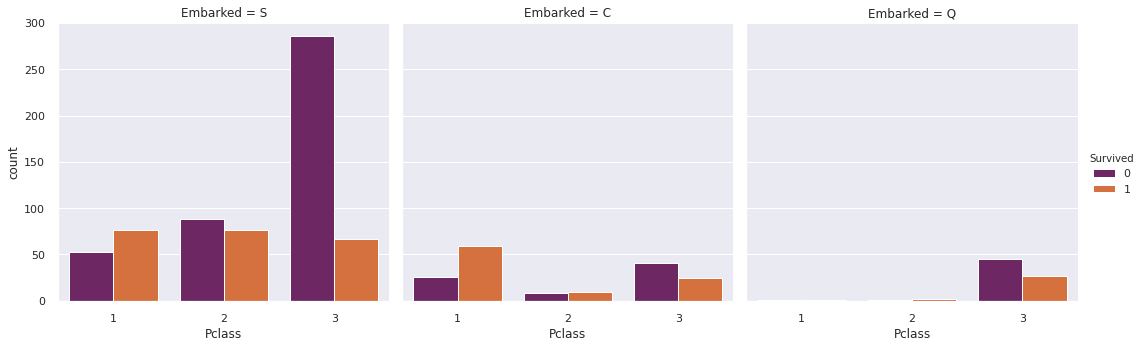

In [48]:
plt.figure(figsize=(8,5))
sns.catplot("Pclass", col="Embarked",hue='Survived',data=train,kind='count',palette="inferno")

**Observations**:

* Survival rate of passengers coming from Southampton(S) seated in Pclass-1 is higher.

<Figure size 576x360 with 0 Axes>

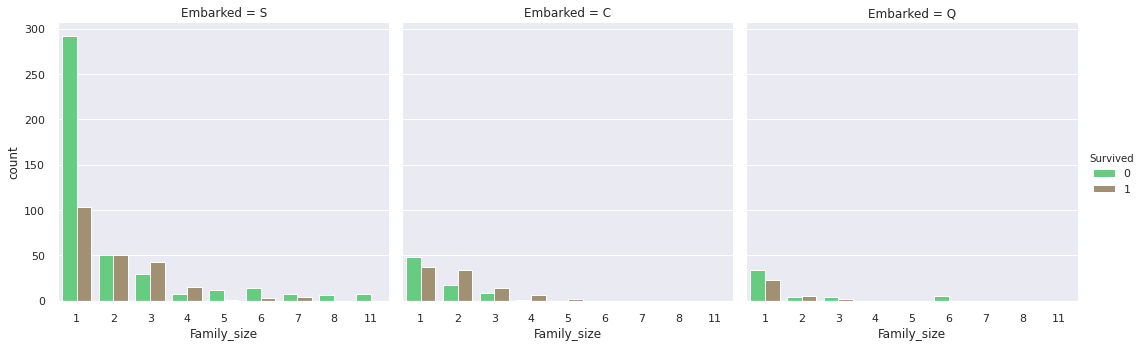

In [49]:
plt.figure(figsize=(8,5))
sns.catplot("Family_size", col="Embarked",hue='Survived',data=train,kind='count',palette="terrain")

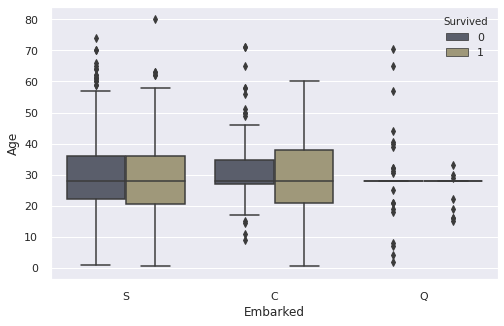

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(y="Age",x="Embarked",hue='Survived',data=train, palette="cividis")

**Observations**:

* Passengers of age 30 have high chances of surviving if they come from Cherbourg (C).

## 6) Fare

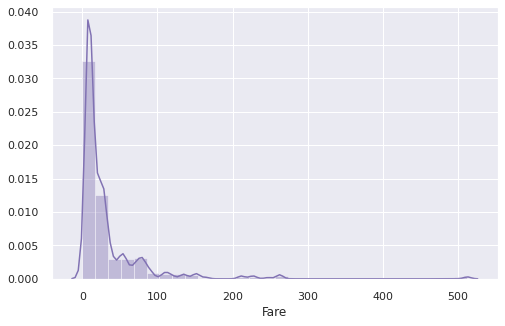

In [51]:
plt.figure(figsize=(8,5))
sns.distplot(train['Fare'],bins=30,color='m')

### Fare values are highly skewed and hence need to be treated with log transformation.

In [52]:
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

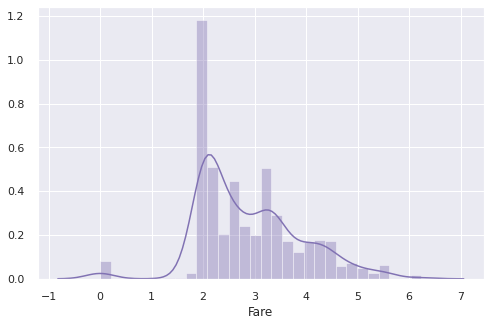

In [53]:
plt.figure(figsize=(8,5))
sns.distplot(train['Fare'],bins=30,color='m')

Skewness is clearly reduced after the log transformation

## Dealing with Categorical Variables

In [54]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size'],
      dtype='object')

## 1) Sex

In [55]:
codes = {"male": 0, "female": 1}
train['Sex']= train['Sex'].map(codes)
test['Sex']= test['Sex'].map(codes)

## 2) Embarked

In [56]:
codes = {"S": 1, "C": 2, "Q": 3}
train['Embarked']= train['Embarked'].map(codes)
test['Embarked']= test['Embarked'].map(codes)

## 3) Cabin

In [57]:
codes= {'M':1,'C':2,'B':3,'D':4,'E':5,'F':6,'A':7,'G':8,'T':9}
train['Cabin']= train['Cabin'].map(codes)

In [58]:
codes= {'M':1,'C':2,'B':3,'D':4,'E':5,'F':6,'A':7,'G':8}
test['Cabin']= test['Cabin'].map(codes)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,2,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,2,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,1,1,1


In [60]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,2.057860,1,3,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,1.945910,1,1,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,2.270836,1,3,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,2.159003,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,2.508582,1,1,3


### We can also drop the columns SibSp and Parch as we have derived a column Family_size out of them.

In [61]:
train.drop(['SibSp','Parch','Ticket'],axis=1,inplace=True)
test.drop(['SibSp','Parch','Ticket'],axis=1,inplace=True)

### Dropping the Name column which doesn't add up to our predictions.

In [62]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [63]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size
0,1,0,3,0,22.0,1.981001,1,1,2
1,2,1,1,1,38.0,4.266662,2,2,2
2,3,1,3,1,26.0,2.070022,1,1,1
3,4,1,1,1,35.0,3.972177,2,1,2
4,5,0,3,0,35.0,2.085672,1,1,1


In [64]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size
0,892,3,0,34.5,2.057860,1,3,1
1,893,3,1,47.0,1.945910,1,1,2
2,894,2,0,62.0,2.270836,1,3,1
3,895,3,0,27.0,2.159003,1,1,1
4,896,3,1,22.0,2.508582,1,1,3


## Model Building

In [65]:
X_train = train.drop(['Survived','PassengerId'], axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

## 1) Logistic Regression :

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

In [66]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [67]:
# Fitting the model on our trained dataset.
LR.fit(X_train,Y_train)

LogisticRegression()

In [68]:
# Making Predictions
y_pred = LR.predict(X_test)

In [69]:
# Calculating the Accuracy of the model.

print("Accuracy:",round(LR.score(X_train, Y_train)*100,2))

Accuracy: 81.14


In [70]:
LR.coef_

array([[-0.71928127,  2.607186  , -0.03918589,  0.38276995,  0.16508147,
         0.21475869, -0.29765598]])

In [71]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Family_size']

## Feature Importance

In [72]:
coeff = pd.DataFrame(X_train.columns)
coeff.columns = ['Feature']
coeff["Correlation"] = pd.Series(LR.coef_[0])

coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.607186
3,Fare,0.382770
5,Embarked,0.214759
4,Cabin,0.165081
2,Age,-0.039186
6,Family_size,-0.297656
0,Pclass,-0.719281


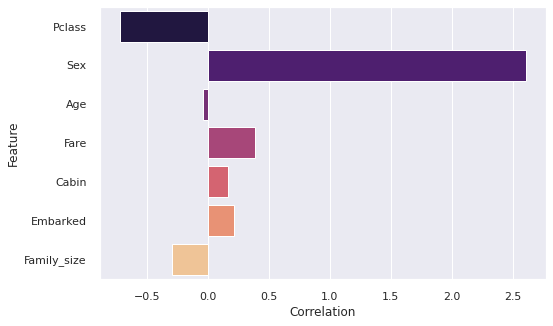

In [73]:
plt.figure(figsize=(8,5))
sns.barplot('Correlation','Feature',data=coeff,palette='magma')

## 2) Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators=100,random_state=22)

In [75]:
# Fitting the model on our trained dataset.
RF.fit(X_train,Y_train)

RandomForestClassifier(random_state=22)

In [76]:
# Making Predictions
y_pred = RF.predict(X_test)

In [77]:
# Calculating the accuracy
print("Accuracy:",round(RF.score(X_train, Y_train)*100,2))

Accuracy: 98.32


In [78]:
feature_imp = pd.Series(RF.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

Sex            0.254219
Age            0.253770
Fare           0.251579
Family_size    0.073757
Pclass         0.068318
Cabin          0.066351
Embarked       0.032004
dtype: float64

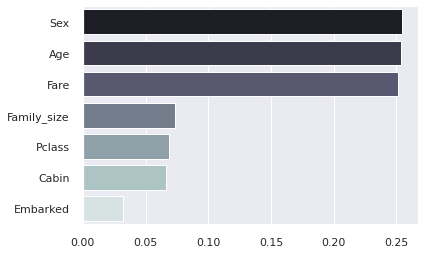

In [79]:
sns.barplot(feature_imp.values,feature_imp.index,palette='bone')

## **Summary:**
    
**Logistic Regression:**

   * **Accuracy** : 81.14
   * **Feature Importance** : Sex,Fare,Cabin

**Random Forest Classifier:**
    
   * **Accuracy**: 98.32
   * **Feature Importance**: Sex,Fare,Age

In [80]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('titanic_2218.csv', index=False)

## If you have reached the end, I would Thank you for investing your precious time here! I would like to hear from you in comments section 😊


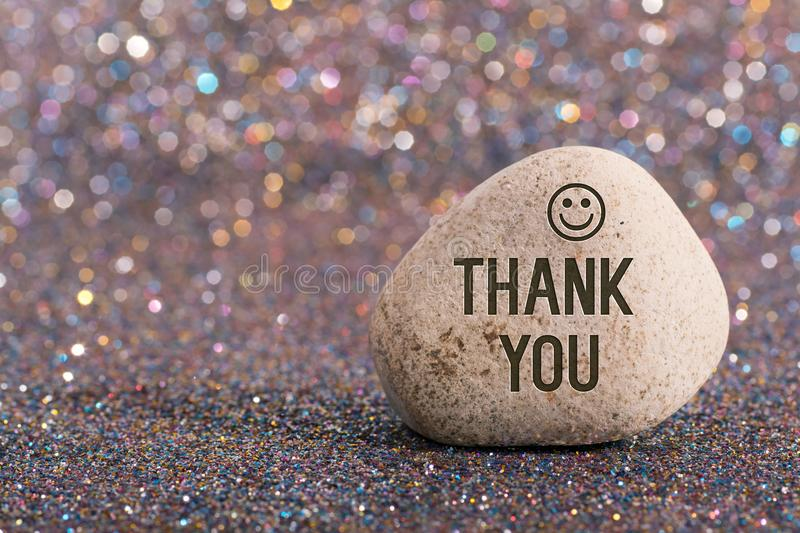